# Airbnb Listings Analysis – New York 2024

## **Introduction**

This project aims to analyze Airbnb listings in New York for 2024, focusing on trends, pricing, availability, and neighborhood dynamics. By examining over 20,000 listings, we seek to derive insights that can aid hosts, travelers, and policymakers in understanding the short-term rental market.

## **Dataset Overview**

The dataset contains 20,758 Airbnb listings in New York City with 22 columns, including:

- *Listing details:* ID, name, room type, price, and availability.

- *Host details:* Host ID, name, and number of listings.

- *Location details:* Neighborhood, latitude, and longitude.

- *Review metrics:* Number of reviews, last review date, and review frequency.

- *Property details:* Bedrooms, beds, baths, and licensing information.

## **Dateset link**
https://www.kaggle.com/datasets/vrindakallu/new-york-dataset

## **Methodology used**

### **1. Initial Data Inspection**  
- The dataset contained 20,758 records with 22 columns, and none of the columns had null values.

### **2. Filtering the Data**  
- Only records from the year 2023 were retained, reducing the dataset to 15,733 records.

### **3. Handling Missing and Outlier Values**  
- The minimum_nights column was capped at a maximum of 90 days. Any values exceeding 90 were set to NA and replaced with the median.  
- The price column showed a high skewness (85.65), so extreme values were replaced with the median.  
- Missing bath values were filled with the mode.  
- Missing ratings were marked as NA, and their percentage was calculated (14.2%).  

### **4. Date Column Transformation**  
- The last_review column was converted into a datetime format.  
- Extracted last_review_year and last_review_month from the last_review column.  

### **5. Feature Engineering**  
- Created a new price_per_day variable by dividing price by minimum_nights.  
- Categorized `price` into the following groups:  
  - **Economy** (<3)  
  - **Budget** (3-8)  
  - **Mid-range** (8-30)  
  - **Premium** (30-100)  
  - **Luxury** (>100)  
- Converted `rating` from object type to numerical for analysis.  

### **6. Type Conversion**  
- Converted last_review to a datetime format.  
- Converted rating from object to float.  
- Converted price, minimum_nights, and baths to integer where necessary.  
- Changed bedrooms column to numeric format using to_numeric().  

### **7. Cleaning and Transforming Text Data**  
- In the name column, removed extra descriptions after the first occurrence of "·".  
- In the bedrooms column, replaced "Studio" with the actual number of beds found in the name column using regex.  
- Converted "Not specified" values in the `baths` column to NA.  

### **8. Dropping Unnecessary Columns**  
- The `id` column was removed as it served no analytical purpose.  

This structured data preparation ensured that the dataset was clean, consistent, and ready for further analysis.


In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [313]:

city = "New York"

neighborhoods = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]

property_prices = {
    "Manhattan": 950000,
    "Brooklyn": 750000,
    "Queens": 600000,
    "Bronx": 450000,
    "Staten Island": 400000
}

for neighborhood in neighborhoods:
    price = property_prices[neighborhood]

    if price > 800000:
        category = "Expensive"
    elif price > 500000:
        category = "Moderate"
    else:
        category = "Affordable"

    print(f"{neighborhood}: ${price} - {category}")


Manhattan: $950000 - Expensive
Brooklyn: $750000 - Moderate
Queens: $600000 - Moderate
Bronx: $450000 - Affordable
Staten Island: $400000 - Affordable


Reading the new_york_listings_2024.csv

In [315]:
data = pd.read_csv(r'C:\Users\Srivatsava CK\OneDrive\data\new_york_listings_2024.csv')

In [316]:
pd.set_option('display.max_columns',None)

Display the first 5 rows of the dataset.

In [318]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


Understanding the Dataset Structure

In [320]:
data.shape

(20758, 22)

In [321]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

From the above data we can see that there are 20758 records 22 columns and none of the columns have null values

### Data Preparation

In [325]:
data['id'].value_counts()

id
1312228               1
780793386308713533    1
21275075              1
33113990              1
32244865              1
                     ..
30441377              1
38486378              1
53709151              1
34673353              1
566029911248687183    1
Name: count, Length: 20758, dtype: int64

Each row has a unique ID, but the ID column is not useful.

Since each row has a unique ID, we are dropping the ID column as it serves no purpose for the analysis.

In [327]:
data.drop('id',axis=1,inplace=True)

Converting the last_review column into a datetime format.

Extracting the year from last_review and store it in the last_review_year column.

Extracting the month from last_review and store it in the last_review_month column.

In [329]:
data['last_review'] = pd.to_datetime(data['last_review'])
data['last_review_year'] = data['last_review'].dt.year
data['last_review_month']= data['last_review'].dt.month

In summary, the code is replacing each numeric month (e.g., 1 for January) in the last_review_month column with the corresponding month abbreviation (e.g., 'Jan').

In [331]:
import calendar
data['last_review_month'] = data['last_review_month'].apply(lambda x: calendar.month_abbr[x])

Counting the occurrences of each unique year in the last_review_year column

In [333]:
data['last_review_year'].value_counts()

last_review_year
2023    15733
2022     1697
2020      830
2019      701
2021      675
2024      596
2018      230
2016      105
2017      103
2015       49
2014       19
2013       13
2012        6
2011        1
Name: count, dtype: int64

We will be analyzing 15,733 records of data.

Filtering the data to retain only rows where the 'last_review_year' is 2023, as we can consider reviews not from 2023 as outdated.

We will only analyze data with 15,733 records in a last review year of 2023.

In [335]:
data = data[data['last_review_year'] == 2023]

In [336]:
data.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'rating', 'bedrooms', 'beds',
       'baths', 'last_review_year', 'last_review_month'],
      dtype='object')

In [337]:
data['host_id'].value_counts()

host_id
162280872    127
51501835     104
61391963      91
219517861     79
137358866     77
            ... 
36907706       1
415120         1
10337114       1
33188          1
93827372       1
Name: count, Length: 9553, dtype: int64

we can see there are 9553 unique host_id, we might need this column for analyis purpose later

In [339]:
data['host_name'].nunique()

4763

we have 4763 unique host names

In [341]:
data["neighbourhood_group"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

we have 5 types of neighbourhood_group

In [343]:
data["neighbourhood"].unique()

array(["Hell's Kitchen", 'Chelsea', 'Washington Heights', 'Murray Hill',
       'Williamsburg', 'Sunset Park', 'Astoria', 'Financial District',
       'Harlem', 'Flushing', 'Midtown', 'Greenpoint', 'Cypress Hills',
       'Kensington', 'Port Richmond', 'East Village',
       'Bedford-Stuyvesant', 'Gravesend', 'Gramercy', 'East Flatbush',
       'St. George', 'South Ozone Park', 'Crown Heights', 'Wakefield',
       'Forest Hills', 'Springfield Gardens', 'Belmont', 'Corona',
       'Tremont', 'West Village', 'Elmhurst', 'Queens Village',
       'Prospect-Lefferts Gardens', 'Fort Greene', 'Allerton', 'Bushwick',
       'Boerum Hill', 'Upper West Side', 'Upper East Side',
       'Richmond Hill', 'East Harlem', 'Morningside Heights', 'Flatlands',
       'St. Albans', 'Flatbush', 'Bay Ridge', 'SoHo', 'Lower East Side',
       'West Brighton', 'Parkchester', 'Brownsville', 'Woodside',
       'Clinton Hill', 'Jackson Heights', 'Kew Gardens', 'Park Slope',
       'Prospect Heights', 'Jamaica', 

In [344]:
data["neighbourhood"].nunique()

219

We have 219 unique neighbourhood names.

Standardizing Neighborhood Names

Converting neighborhood names to lowercase and sort them to check for inconsistencies.

In [346]:
data["neighbourhood"] = data["neighbourhood"].str.lower()

In [347]:
#sorting them in alphabetical order to check errors
data["neighbourhood"].sort_values().unique()

array(['allerton', 'arden heights', 'arrochar', 'arverne', 'astoria',
       'bath beach', 'battery park city', 'bay ridge', 'bay terrace',
       'bay terrace, staten island', 'baychester', 'bayside', 'bayswater',
       'bedford-stuyvesant', 'belle harbor', 'bellerose', 'belmont',
       'bensonhurst', 'bergen beach', 'boerum hill', 'borough park',
       'breezy point', 'briarwood', 'brighton beach', 'bronxdale',
       'brooklyn heights', 'brownsville', "bull's head", 'bushwick',
       'cambria heights', 'canarsie', 'carroll gardens', 'castle hill',
       'castleton corners', 'chelsea', 'chinatown', 'city island',
       'civic center', 'claremont village', 'clason point', 'clifton',
       'clinton hill', 'co-op city', 'cobble hill', 'college point',
       'columbia st', 'concord', 'concourse', 'concourse village',
       'coney island', 'corona', 'crown heights', 'cypress hills',
       'ditmars steinway', 'dongan hills', 'douglaston',
       'downtown brooklyn', 'dumbo', 'dyk

In [348]:
data["neighbourhood"].nunique()

219

There are no inconsistencies in neighbourwood columns

In [350]:
data["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

There are 4 types of room_type

Investigating rating column

In [353]:
data["rating"].unique()

array(['4.67 ', '4.17 ', '4.64 ', '4.91 ', '5.0 ', '4.50 ', '4.79 ',
       'No rating', '4.71 ', '4.33 ', '4.82 ', '4.69 ', '4.74 ', '4.87 ',
       '4.66 ', '4.58 ', '4.95 ', '4.78 ', '4.83 ', '4.73 ', '4.15 ',
       '4.45 ', '4.86 ', '4.42 ', '4.81 ', '3.84 ', '4.27 ', '4.21 ',
       '4.93 ', '4.61 ', '4.77 ', '4.40 ', '4.53 ', '4.94 ', '4.76 ',
       '4.70 ', '4.60 ', '4.96 ', '4.43 ', '4.56 ', '3.60 ', '3.0 ',
       '3.82 ', '4.90 ', '4.80 ', '4.92 ', '4.85 ', '4.0 ', '4.97 ',
       '4.89 ', '4.63 ', '4.38 ', '4.72 ', '4.25 ', '4.99 ', '4.20 ',
       '4.54 ', '4.88 ', '4.59 ', '4.75 ', '4.18 ', '4.62 ', 'New ',
       '4.68 ', '4.29 ', '3.40 ', '4.44 ', '4.36 ', '4.98 ', '4.55 ',
       '4.26 ', '4.46 ', '4.30 ', '4.12 ', '4.06 ', '4.51 ', '2.33 ',
       '4.47 ', '4.84 ', '4.57 ', '4.65 ', '4.39 ', '4.41 ', '4.35 ',
       '3.88 ', '3.92 ', '3.67 ', '3.75 ', '3.86 ', '4.07 ', '4.52 ',
       '4.49 ', '4.23 ', '4.31 ', '4.13 ', '3.33 ', '3.50 ', '3.80 ',
       '3.79 ', '4.1

we can see the the data type of rating is object type  as we have New and No rating values. let's filter them and investigate the rows

In [355]:
print(data.loc[data["rating"] == "New ", ["name", "rating"]].to_string())

                                                                        name rating
275              Rental unit in Queens · ★New · 2 bedrooms · 2 beds · 1 bath   New 
376            Hotel in New York · ★New · 1 bedroom · 1 bed · 1 private bath   New 
575                    Hotel in New York · ★New · 1 bedroom · 1 bed · 1 bath   New 
693                Home in Brooklyn · ★New · 3 bedrooms · 4 beds · 2.5 baths   New 
1062           Rental unit in Brooklyn · ★New · 3 bedrooms · 4 beds · 1 bath   New 
1318          Rental unit in Brooklyn · ★New · 1 bedroom · 1 bed · 1.5 baths   New 
1432             Rental unit in Brooklyn · ★New · 1 bedroom · 1 bed · 1 bath   New 
1539            Rental unit in New York · ★New · 1 bedroom · 4 beds · 1 bath   New 
1682           Rental unit in New York · ★New · 2 bedrooms · 2 beds · 1 bath   New 
1779     Serviced apartment in The Bronx · ★New · 1 bedroom · 1 bed · 1 bath   New 
1860                      Condo in New York · ★New · Studio · 1 bed · 1 bath

We can clearly observe that 126 records have "New" listed as the rating. The name column is maintained to validate the correctness of data across columns like rating, bedrooms, beds, and baths, ensuring consistency and accuracy in these critical fields.

In [357]:
data.loc[data["rating"] == "No rating", ["name", "rating"]]

,name,rating
10,Rental unit in Queens · 1 bedroom · 2 beds · 1...,No rating
12,Rental unit in New York · 1 bedroom · 1 bed · ...,No rating
24,Hotel in New York · 1 bedroom · 1 bed · 1 bath,No rating
29,Rental unit in New York · 1 bedroom · 1 bed · ...,No rating
67,Rental unit in Brooklyn · 1 bedroom · 3 beds ·...,No rating
...,...,...
20728,Rental unit in New York · Studio · 1 bed · 1 bath,No rating
20744,Rental unit in New York · 2 bedrooms · 2 beds ...,No rating
20746,Rental unit in New York · 1 bedroom · 2 beds ·...,No rating
20747,Rental unit in New York · 1 bedroom · 1 bed · ...,No rating


2111 values are with no ratings.

From name column we can see that rating values are missing

We will add NA to rating column where the rating values is both "New "and "No rating"

In [360]:
data['rating'] = data['rating'].replace(['New ', 'No rating'], pd.NA)

In [361]:
data["rating"].unique()

array(['4.67 ', '4.17 ', '4.64 ', '4.91 ', '5.0 ', '4.50 ', '4.79 ', <NA>,
       '4.71 ', '4.33 ', '4.82 ', '4.69 ', '4.74 ', '4.87 ', '4.66 ',
       '4.58 ', '4.95 ', '4.78 ', '4.83 ', '4.73 ', '4.15 ', '4.45 ',
       '4.86 ', '4.42 ', '4.81 ', '3.84 ', '4.27 ', '4.21 ', '4.93 ',
       '4.61 ', '4.77 ', '4.40 ', '4.53 ', '4.94 ', '4.76 ', '4.70 ',
       '4.60 ', '4.96 ', '4.43 ', '4.56 ', '3.60 ', '3.0 ', '3.82 ',
       '4.90 ', '4.80 ', '4.92 ', '4.85 ', '4.0 ', '4.97 ', '4.89 ',
       '4.63 ', '4.38 ', '4.72 ', '4.25 ', '4.99 ', '4.20 ', '4.54 ',
       '4.88 ', '4.59 ', '4.75 ', '4.18 ', '4.62 ', '4.68 ', '4.29 ',
       '3.40 ', '4.44 ', '4.36 ', '4.98 ', '4.55 ', '4.26 ', '4.46 ',
       '4.30 ', '4.12 ', '4.06 ', '4.51 ', '2.33 ', '4.47 ', '4.84 ',
       '4.57 ', '4.65 ', '4.39 ', '4.41 ', '4.35 ', '3.88 ', '3.92 ',
       '3.67 ', '3.75 ', '3.86 ', '4.07 ', '4.52 ', '4.49 ', '4.23 ',
       '4.31 ', '4.13 ', '3.33 ', '3.50 ', '3.80 ', '3.79 ', '4.19 ',
       '4.16 ', '

In [362]:
null_percentage_ratings = (data['rating'].isnull().sum() / len(data)) * 100
print(null_percentage_ratings)


14.21852157884701


14.2% of rating data are NA now

Converts rating column to numeric (float).

In [364]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

In [365]:
data['rating'].dtype

dtype('float64')

In [366]:
data["rating"].unique()

array([4.67, 4.17, 4.64, 4.91, 5.  , 4.5 , 4.79,  nan, 4.71, 4.33, 4.82,
       4.69, 4.74, 4.87, 4.66, 4.58, 4.95, 4.78, 4.83, 4.73, 4.15, 4.45,
       4.86, 4.42, 4.81, 3.84, 4.27, 4.21, 4.93, 4.61, 4.77, 4.4 , 4.53,
       4.94, 4.76, 4.7 , 4.6 , 4.96, 4.43, 4.56, 3.6 , 3.  , 3.82, 4.9 ,
       4.8 , 4.92, 4.85, 4.  , 4.97, 4.89, 4.63, 4.38, 4.72, 4.25, 4.99,
       4.2 , 4.54, 4.88, 4.59, 4.75, 4.18, 4.62, 4.68, 4.29, 3.4 , 4.44,
       4.36, 4.98, 4.55, 4.26, 4.46, 4.3 , 4.12, 4.06, 4.51, 2.33, 4.47,
       4.84, 4.57, 4.65, 4.39, 4.41, 4.35, 3.88, 3.92, 3.67, 3.75, 3.86,
       4.07, 4.52, 4.49, 4.23, 4.31, 4.13, 3.33, 3.5 , 3.8 , 3.79, 4.19,
       4.16, 2.83, 4.48, 3.71, 3.36, 4.14, 4.22, 4.32, 3.25, 3.89, 4.09,
       4.04, 3.38, 3.93, 4.24, 3.96, 3.57, 4.03, 3.17, 3.63, 4.05, 3.78,
       4.08, 3.94, 4.28, 4.37, 4.11, 4.1 , 3.64, 3.83, 3.9 , 3.73, 3.42,
       3.81, 4.34, 3.2 , 2.  , 2.67, 3.97, 3.27, 2.88, 3.13, 2.8 , 2.25,
       3.95, 3.29, 3.85, 3.58, 3.77, 3.65, 3.87, 2.

Checking the skewness of the rating data to determine whether to replace values with the mean or median.

In [368]:
skew_value = skew(data['rating'].dropna())
print(f'Skewness: {skew_value}')

Skewness: -2.649768208373159


Based on skewness the data is left skewed

Lets plot histogram to reconfirm the skewness

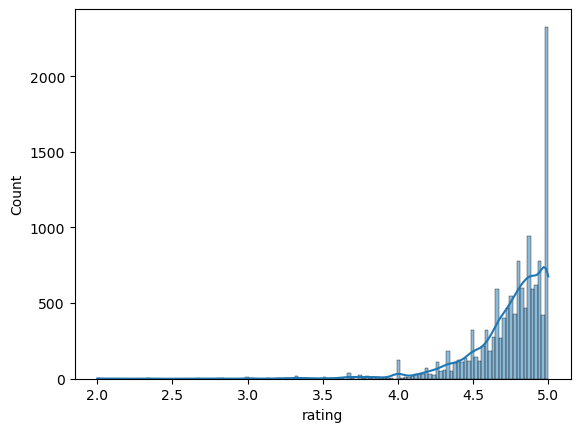

In [370]:
sns.histplot(data['rating'], kde=True)
plt.show()

In [371]:
data['rating'].fillna(data['rating'].median(), inplace=True)

C:\Users\Srivatsava CK\AppData\Local\Temp\ipykernel_46572\2664373811.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [372]:
data["rating"].unique()

array([4.67, 4.17, 4.64, 4.91, 5.  , 4.5 , 4.79, 4.81, 4.71, 4.33, 4.82,
       4.69, 4.74, 4.87, 4.66, 4.58, 4.95, 4.78, 4.83, 4.73, 4.15, 4.45,
       4.86, 4.42, 3.84, 4.27, 4.21, 4.93, 4.61, 4.77, 4.4 , 4.53, 4.94,
       4.76, 4.7 , 4.6 , 4.96, 4.43, 4.56, 3.6 , 3.  , 3.82, 4.9 , 4.8 ,
       4.92, 4.85, 4.  , 4.97, 4.89, 4.63, 4.38, 4.72, 4.25, 4.99, 4.2 ,
       4.54, 4.88, 4.59, 4.75, 4.18, 4.62, 4.68, 4.29, 3.4 , 4.44, 4.36,
       4.98, 4.55, 4.26, 4.46, 4.3 , 4.12, 4.06, 4.51, 2.33, 4.47, 4.84,
       4.57, 4.65, 4.39, 4.41, 4.35, 3.88, 3.92, 3.67, 3.75, 3.86, 4.07,
       4.52, 4.49, 4.23, 4.31, 4.13, 3.33, 3.5 , 3.8 , 3.79, 4.19, 4.16,
       2.83, 4.48, 3.71, 3.36, 4.14, 4.22, 4.32, 3.25, 3.89, 4.09, 4.04,
       3.38, 3.93, 4.24, 3.96, 3.57, 4.03, 3.17, 3.63, 4.05, 3.78, 4.08,
       3.94, 4.28, 4.37, 4.11, 4.1 , 3.64, 3.83, 3.9 , 3.73, 3.42, 3.81,
       4.34, 3.2 , 2.  , 2.67, 3.97, 3.27, 2.88, 3.13, 2.8 , 2.25, 3.95,
       3.29, 3.85, 3.58, 3.77, 3.65, 3.87, 2.75, 3.

In [373]:
data["bedrooms"].unique()

array(['2', '1', 'Studio', '3', '6', '4', '5', '7', '15', '9', '8', '14'],
      dtype=object)

There are many beds, so we want to verify if the information is accurate.

Additionally, "Studio" is listed under bedrooms.

lets filter rows where bedrooms = '7','15','9','8','14'

In [375]:
print(data[data["bedrooms"].isin(['7','8','9','14','15'])][["name","bedrooms"]].to_string())

                                                                    name bedrooms
1827            Home in Brooklyn · ★5.0 · 7 bedrooms · 12 beds · 4 baths        7
2171       Loft in New York · ★3.17 · 7 bedrooms · 1 bed · 1 shared bath        7
3545           Rental unit in New York · 15 bedrooms · 21 beds · 6 baths       15
4733            Home in Brooklyn · ★5.0 · 9 bedrooms · 11 beds · 4 baths        9
6682   Home in NEW YORK  · ★4.43 · 8 bedrooms · 11 beds · 4 shared baths        8
7287       Townhouse in New York · ★4.57 · 7 bedrooms · 8 beds · 5 baths        7
8177     Rental unit in New York · ★5.0 · 9 bedrooms · 12 beds · 3 baths        9
8256    Rental unit in Brooklyn · ★4.65 · 7 bedrooms · 10 beds · 2 baths        7
10547            Home in Queens · ★4.95 · 7 bedrooms · 14 beds · 4 baths        7
11241          Home in Brooklyn · ★4.87 · 9 bedrooms · 11 beds · 4 baths        9
11256          Home in Brooklyn · ★4.56 · 8 bedrooms · 10 beds · 4 baths        8
18156     Condo 

filter rows with bedrooms as studio

In [377]:
data[data["bedrooms"] == "Studio"][["name","bedrooms","room_type"]]

,name,bedrooms,room_type
4,Condo in New York · ★4.91 · Studio · 1 bed · 1...,Studio,Entire home/apt
11,Rental unit in Brooklyn · ★4.71 · Studio · 1 b...,Studio,Entire home/apt
43,Home in Queens · ★4.67 · Studio · 3 beds · 1 s...,Studio,Private room
56,Rental unit in New York · ★5.0 · Studio · 1 be...,Studio,Entire home/apt
57,Serviced apartment in Brooklyn · ★4.95 · Studi...,Studio,Hotel room
...,...,...,...
20728,Rental unit in New York · Studio · 1 bed · 1 bath,Studio,Entire home/apt
20732,Rental unit in New York · ★5.0 · Studio · 1 be...,Studio,Entire home/apt
20736,Rental unit in New York · ★4.67 · Studio · 1 b...,Studio,Entire home/apt
20738,Rental unit in New York · ★4.86 · Studio · 2 b...,Studio,Entire home/apt


We will have to replace studio with number following it in name column which is actually bedroom value

We will replace "Studio" in the bedrooms column with the number of beds found in the name column, if available; otherwise, it should keep the original value.

We will use regular expression to achieve this. Although not thought, regular expression was thought in R.

In [379]:
import re
def replace_studio(row):
    if row['bedrooms'] == 'Studio':
        match = re.search(r'(\d+)\s*Bed', str(row['name']), re.IGNORECASE)
        if match:
            return match.group(1) 
    return row['bedrooms']

data['bedrooms'] = data.apply(replace_studio, axis=1)


In [380]:
data[data["bedrooms"] == "Studio"][["name","bedrooms","room_type"]]

,name,bedrooms,room_type
1636,Rental unit in New York · ★4.84 · Studio · 1 bath,Studio,Entire home/apt
1692,Loft in New York · Studio · 1.5 baths,Studio,Entire home/apt
2531,Home in New York · ★4.82 · Studio · 1.5 baths,Studio,Entire home/apt
3020,Rental unit in New York · ★New · Studio · 1 bath,Studio,Entire home/apt
3389,Rental unit in New York · ★5.0 · Studio · 1 bath,Studio,Entire home/apt
4162,Hotel in Brooklyn · ★New · Studio · 1 private ...,Studio,Private room
4360,Rental unit in New York · ★4.81 · Studio · 1 bath,Studio,Entire home/apt
4636,Rental unit in Brooklyn · Studio · 1 bath,Studio,Entire home/apt
4690,Rental unit in New York · ★4.60 · Studio · 1 bath,Studio,Entire home/apt
5321,Rental unit in Brooklyn · ★4.85 · Studio · 1 p...,Studio,Private room


We still have Studio value in bedrooms column

Need to replace Studio value in bedrooms column with NA

In [382]:
data['bedrooms'] = data['bedrooms'].replace('Studio', pd.NA)

In [383]:
data['bedrooms'].unique()

array(['2', '1', '3', '6', '4', '5', <NA>, '7', '15', '9', '8', '14'],
      dtype=object)

In [384]:
null_percentage_bedrooms = (data['bedrooms'].isnull().sum() / len(data)) * 100
print(null_percentage_bedrooms)

0.2860230089620543


Converting rating column to integer type

In [386]:
data['bedrooms'] = pd.to_numeric(data['bedrooms'], errors='coerce').astype('Int64')

replace NA value with mode for bedrooms column

In [388]:
data['bedrooms'].fillna(data['bedrooms'].mode()[0], inplace=True)

C:\Users\Srivatsava CK\AppData\Local\Temp\ipykernel_46572\1046839375.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [389]:
data['bedrooms'].unique()

<IntegerArray>
[2, 1, 3, 6, 4, 5, 7, 15, 9, 8, 14]
Length: 11, dtype: Int64

In [390]:
data["bedrooms"].dtype

Int64Dtype()

In [391]:
data['beds'].unique()

array([ 1,  2,  3,  5,  4,  8,  6, 10,  7, 12,  9, 21, 11, 14, 13, 18, 42],
      dtype=int64)

In [392]:
data['beds'].dtype

dtype('int64')

In [393]:
data['baths'].unique()

array(['1', '3', '2', '4', '1.5', '0', '2.5', '5', '4.5', '6', '3.5',
       '5.5', 'Not specified', '6.5', '15.5'], dtype=object)

Initially thought we can't have bathrooms values to .5, but .5 means just toilet. So that is not a problem. Need to check 0 bathroom from the name column

Select name and baths column where bath is equal to 0

In [396]:
data.loc[data['baths'] == '0', ['name', 'baths']]

,name,baths
165,Rental unit in New York · 1 bedroom · 1 bed · ...,0
1123,Rental unit in New York · ★4.19 · 1 bedroom · ...,0
1756,Rental unit in New York · ★4.09 · 1 bedroom · ...,0
1832,Rental unit in New York · ★4.31 · 1 bedroom · ...,0
1891,Rental unit in New York · ★4.38 · 1 bedroom · ...,0
2103,Rental unit in New York · ★3.96 · 1 bedroom · ...,0
2122,Rental unit in New York · ★4.03 · 1 bedroom · ...,0
2491,Rental unit in New York · 1 bedroom · 1 bed · ...,0
2568,Rental unit in New York · ★4.19 · 1 bedroom · ...,0
2709,Hotel in New York · ★4.60 · 1 bedroom · 1 bed ...,0


We can have 0 bathrooms, so no modification needed

Select name and baths column where bath is equal to 'Not specified'

In [398]:
data.loc[data['baths'] == 'Not specified', ['name', 'baths']]

,name,baths
5408,Townhouse in Brooklyn · ★4.87 · Studio,Not specified
12800,Home in Brooklyn · ★4.96 · 1 bedroom · 1 bed,Not specified
13873,Hotel in New York · Studio · 1 bed,Not specified
14127,Home in Queens · ★4.74 · 1 bedroom,Not specified
15088,Rental unit in New York · ★4.59 · Studio · 2 beds,Not specified
20750,Rental unit in New York · ★5.0 · 1 bedroom,Not specified


Changing not specified values to NA

In [400]:
data['baths'] = data['baths'].replace('Not specified', pd.NA)

In [401]:
data['baths'].unique()

array(['1', '3', '2', '4', '1.5', '0', '2.5', '5', '4.5', '6', '3.5',
       '5.5', <NA>, '6.5', '15.5'], dtype=object)

In [402]:
data['baths'] = pd.to_numeric(data['baths'], errors='coerce').astype('float')

Replacing nan with mode

In [404]:
data['baths'].fillna(data['baths'].mode()[0], inplace=True)

C:\Users\Srivatsava CK\AppData\Local\Temp\ipykernel_46572\2112247136.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [405]:
data['baths'].unique()

array([ 1. ,  3. ,  2. ,  4. ,  1.5,  0. ,  2.5,  5. ,  4.5,  6. ,  3.5,
        5.5,  6.5, 15.5])

Now we don't need extra information in name column so we will remove string in name column after first "."

In [407]:
data['name'] = data['name'].str.split('·').str[0].str.strip()

In [408]:
data['name'].head()

1    Rental unit in New York
2    Rental unit in New York
3    Rental unit in New York
4          Condo in New York
5    Rental unit in New York
Name: name, dtype: object

In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15733 entries, 1 to 20757
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15733 non-null  object        
 1   host_id                         15733 non-null  int64         
 2   host_name                       15733 non-null  object        
 3   neighbourhood_group             15733 non-null  object        
 4   neighbourhood                   15733 non-null  object        
 5   latitude                        15733 non-null  float64       
 6   longitude                       15733 non-null  float64       
 7   room_type                       15733 non-null  object        
 8   price                           15733 non-null  float64       
 9   minimum_nights                  15733 non-null  int64         
 10  number_of_reviews               15733 non-null  int64         
 11  last_re

Checking null values in each column interms of percentage

In [411]:
null_percentages = (data.isnull().sum() / len(data)) * 100
print(null_percentages)

name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
license                           0.0
rating                            0.0
bedrooms                          0.0
beds                              0.0
baths                             0.0
last_review_year                  0.0
last_review_month                 0.0
dtype: float64


Now lets work on numeric data

Now get statistics information on numeric data

In [413]:
data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15733.000000,15733.000000,15733.000000,15733.000000,15733.000000,15733.000000,15733.000000
mean,179.026823,27.264222,47.836204,1.445565,15.957160,215.450772,13.116634
std,1138.816103,27.374094,75.634019,1.739942,56.767617,128.715162,20.034484
min,10.000000,1.000000,1.000000,0.020000,1.000000,0.000000,0.000000
25%,82.000000,30.000000,5.000000,0.330000,1.000000,90.000000,2.000000
50%,125.000000,30.000000,19.000000,0.940000,2.000000,231.000000,6.000000
75%,197.000000,30.000000,58.000000,2.090000,5.000000,353.000000,19.000000
max,100000.000000,1000.000000,1618.000000,68.930000,713.000000,365.000000,1075.000000


Max value is 100,000 which looks impossible

Creating box plot horizontally for price outliers

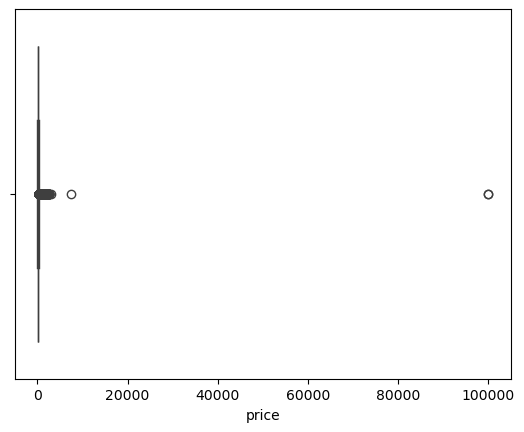

In [415]:
sns.boxplot(x=data['price'])
plt.show()

filtering rows where the price column is 100000 which is an outlier

In [417]:
data[data['price'] == 100000]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,last_review_year,last_review_month
3990,Rental unit in Brooklyn,110361431,Bobbi,Brooklyn,bedford-stuyvesant,40.69085,-73.93806,Private room,100000.0,30,29,2023-10-20,0.96,2,346,10,No License,4.48,1,1,1.0,2023,Oct
5492,Rental unit in Brooklyn,110361431,Bobbi,Brooklyn,bedford-stuyvesant,40.69254,-73.93636,Private room,100000.0,30,9,2023-10-31,0.45,2,365,5,No License,4.33,1,1,1.0,2023,Oct


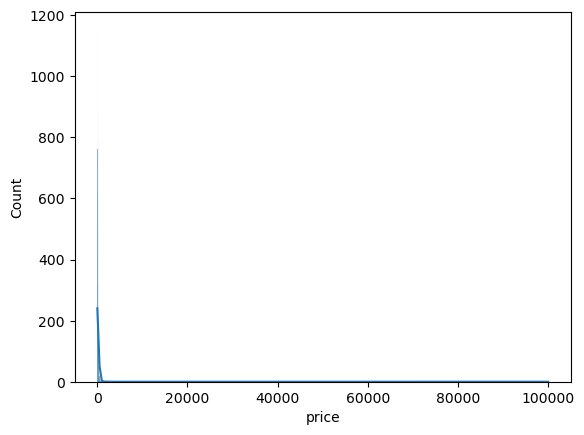

In [418]:
sns.histplot(data['price'], kde=True)
plt.show()

In [419]:
skew_value = skew(data['price'].dropna())
print(f'Skewness: {skew_value}')

Skewness: 85.65008152620963


Data is clearly skewed we will replace NA value with median price to it

In [421]:
data['price'] = data['price'].replace(100000, np.nan)

Price data is right skewed so we can replace NA value with median price to it

In [423]:
data['price'].fillna(data['price'].median(), inplace=True)

C:\Users\Srivatsava CK\AppData\Local\Temp\ipykernel_46572\1742672872.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Counting the values of price column where price exceeds 1000, just checking

In [425]:
data[data['price'] > 1000]['price'].count()

85

there are 85 records with price value greater than 1000 so not making any changes as mean value will not be affected too much for data analysis

Minimum nights of 1000 doesn't make sense so let's look at box plot for mimimum nights column

<module 'matplotlib.pyplot' from 'C:\\Users\\Srivatsava CK\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

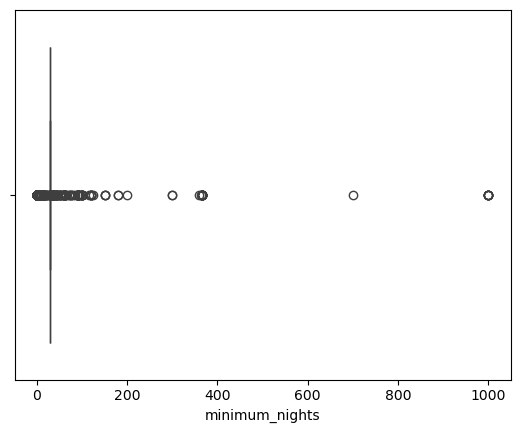

In [428]:
sns.boxplot(x=data['minimum_nights'])
plt

Though the data is right but for caculation purpose I am sticking with 90 days as max of minimum nights for analysis purpose

Converting values to NA for minimum nights value exceeding 90

Using apply and lambda function

In [430]:
data['minimum_nights'] = data['minimum_nights'].apply(lambda x: pd.NA if x > 90 else x)

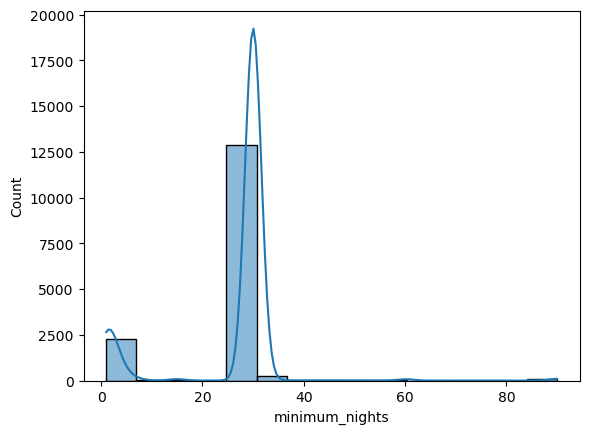

In [431]:
sns.histplot(data['minimum_nights'], kde=True)
plt.show()

Replacing NA values of mimimum nights with median values

In [433]:
data['minimum_nights'].fillna(data['minimum_nights'].median(), inplace=True)

C:\Users\Srivatsava CK\AppData\Local\Temp\ipykernel_46572\1623389380.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Srivatsava CK\AppData\Local\Temp\ipykernel_46572\1623389380.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



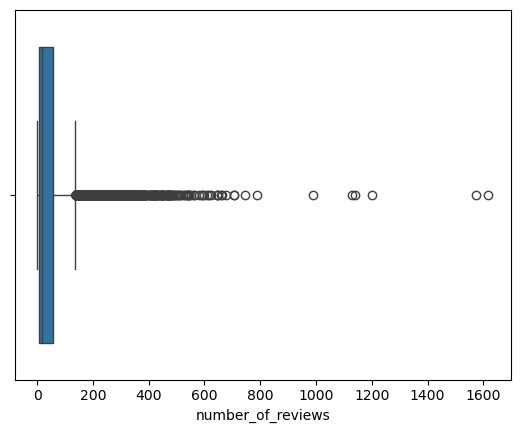

In [434]:
sns.boxplot(x=data['number_of_reviews'])
plt.show()

First we are creating price_per_category by dividing price by minimum_nights 

Then creating a new price category by classifying price_per_day into five groups:  
- Economy (<3)  
- Budget (3-8)  
- Mid-range (8-30)  
- Premium (30-100)  
- Luxury (>100)  

This classification is then applied to the price_per_day column, generating a new price_category column in the dataset.

In total we are creating two new columns price_per_day and price_category


In [436]:

data['price_per_day'] = data['price'] / data['minimum_nights'].replace(0, 1)  


def price_category(price_per_day):
    if price_per_day < 3:
        return 'Economy'
    elif 3 <= price_per_day < 8:
        return 'Budget'
    elif 8 <= price_per_day < 30:
        return 'Mid-range'
    elif 30 <= price_per_day <= 100:
        return 'Premium'
    else:
        return 'Luxury'


data['price_category'] = data['price_per_day'].apply(price_category)

### Data Analysis & Insights

1) How many Airbnb listings are there in each of the five price categories (Economy, Budget, Mid-range, Premium, Luxury)?

In [439]:
data['price_category'].value_counts()

price_category
Budget       7086
Economy      4320
Mid-range    2017
Luxury       1246
Premium      1064
Name: count, dtype: int64

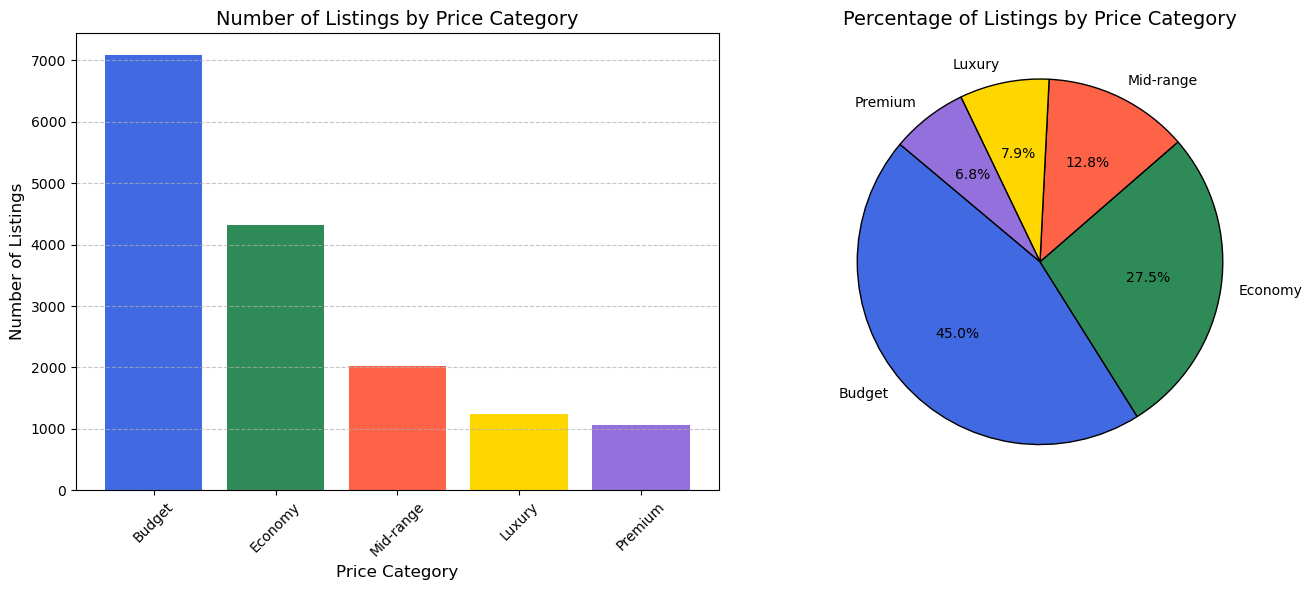

In [639]:
import matplotlib.pyplot as plt

price_category_counts = data['price_category'].value_counts()

colors = ["royalblue", "seagreen", "tomato", "gold", "mediumpurple"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(price_category_counts.index, price_category_counts, color=colors)
axes[0].set_xlabel("Price Category", fontsize=12)
axes[0].set_ylabel("Number of Listings", fontsize=12)
axes[0].set_title("Number of Listings by Price Category", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

axes[1].pie(
    price_category_counts, 
    labels=price_category_counts.index, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title("Percentage of Listings by Price Category", fontsize=14)

plt.tight_layout()

plt.show()


*The data shows the number of Airbnb listings in each price category: Budget (7,086), Economy (4,320), Mid-range (2,017), Luxury (1,246), and Premium (1,064).*
*The pie chart shows that Budget (45%) and Economy (27.5%) listings dominate NYC’s Airbnb market, while Mid-range (12.8%), Luxury (7.9%), and Premium (6.8%) make up a smaller share.*

*This indicates that most listings cater to budget-conscious travelers, while high-end options are less common.*

2) What are the most common room types?

In [443]:
data['room_type'].value_counts()

room_type
Entire home/apt    8967
Private room       6489
Shared room         219
Hotel room           58
Name: count, dtype: int64

*The most common room type is Entire home/apt (8,967 listings), followed by Private rooms (6,489 listings), indicating that most Airbnb hosts offer full properties or private spaces. Shared rooms (219) and hotel rooms (58) are much less common, showing limited demand or supply for these options.*

3) What is the average price for each room type?

In [446]:
data.groupby("room_type")["price"].mean().sort_values()

room_type
Private room       108.679920
Shared room        118.831050
Entire home/apt    208.501059
Hotel room         275.896552
Name: price, dtype: float64

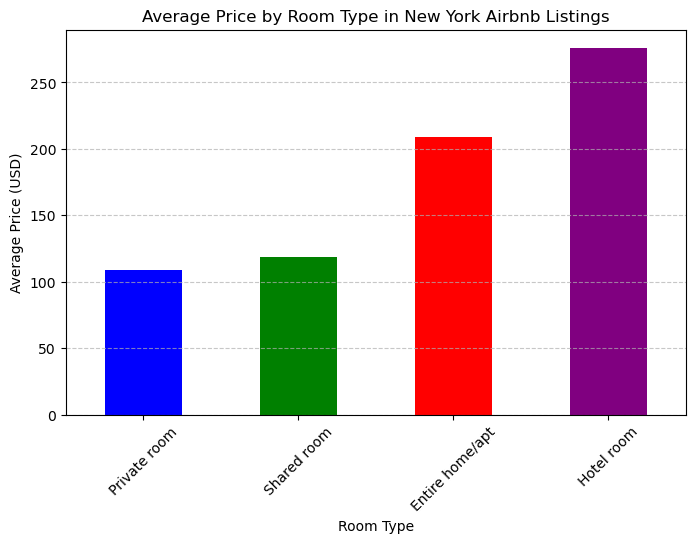

In [447]:
room_type_price = data.groupby("room_type")["price"].mean().sort_values()


plt.figure(figsize=(8, 5))
room_type_price.plot(kind="bar", color=["blue", "green", "red", "purple"])


plt.xlabel("Room Type")
plt.ylabel("Average Price (USD)")
plt.title("Average Price by Room Type in New York Airbnb Listings")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

*Hotel rooms have the highest average price (275.90 USD), followed by entire homes/apartments (208.50 USD), while shared rooms (118.83 USD) and private rooms (108.68 USD) are more affordable. This suggests that full properties and hotel-style accommodations cater to higher-paying guests, while private and shared rooms appeal to budget-conscious travelers.*

4) Top five expensive listings

In [450]:
data[['name', 'price']].sort_values(by='price', ascending=False).head(5)

,name,price
4967,Rental unit in Brooklyn,7498.0
15468,Rental unit in New York,3131.0
1686,Townhouse in New York,2643.0
16114,Hotel in New York,2586.0
15467,Rental unit in New York,2505.0


*The most expensive listing is a rental unit in Brooklyn, priced at $7,498.
New York appears multiple times in the top five, indicating it is a hotspot for high-end rentals.
The high prices suggest a demand for exclusive, luxury properties in these locations.*

5) How many listings are available in each neighbourhood group

In [453]:
data['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn         5925
Manhattan        5901
Queens           2915
Bronx             761
Staten Island     231
Name: count, dtype: int64

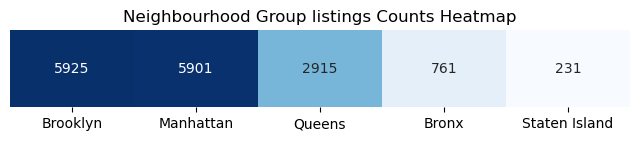

In [454]:
neighbourhood_counts = data['neighbourhood_group'].value_counts()

neighbourhood_counts_reshaped = neighbourhood_counts.values.reshape(1, -1)

plt.figure(figsize=(8, 1))
sns.heatmap(neighbourhood_counts_reshaped, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=neighbourhood_counts.index, yticklabels=False)

plt.title('Neighbourhood Group listings Counts Heatmap')
plt.show()


*Brooklyn and Manhattan have the highest number of listings, with 5,925 and 5,901 respectively, making them the primary areas for Airbnb rentals.
Queens has a notable presence with 2,915 listings, while Bronx and Staten Island have significantly fewer listings, with 761 and 231 respectively.
This indicates that Brooklyn and Manhattan are the most popular and heavily listed neighborhoods, while Staten Island and the Bronx have a much smaller supply.*

6) What is the average price for each neighbourhood group(boroughs)?

In [457]:
mean_price_by_neighbourhood = data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print(mean_price_by_neighbourhood)

neighbourhood_group
Manhattan        205.544653
Brooklyn         157.437468
Staten Island    126.640693
Queens           123.749571
Bronx            106.647832
Name: price, dtype: float64


*Manhattan has the highest average price at 205.54 USD, indicating it is a more expensive area for Airbnb rentals.
Brooklyn follows with an average price of 157.44 USD, still relatively high compared to other boroughs.
Staten Island has the lowest average price at 126.64 USD, making it the most affordable borough for Airbnb rentals.
Queens and Bronx have average prices of 123.75 USD and 106.65 USD, respectively, showing that these areas offer more budget-friendly options.*

7) What is the price distribution across different neighbourhood groups (boroughs)?

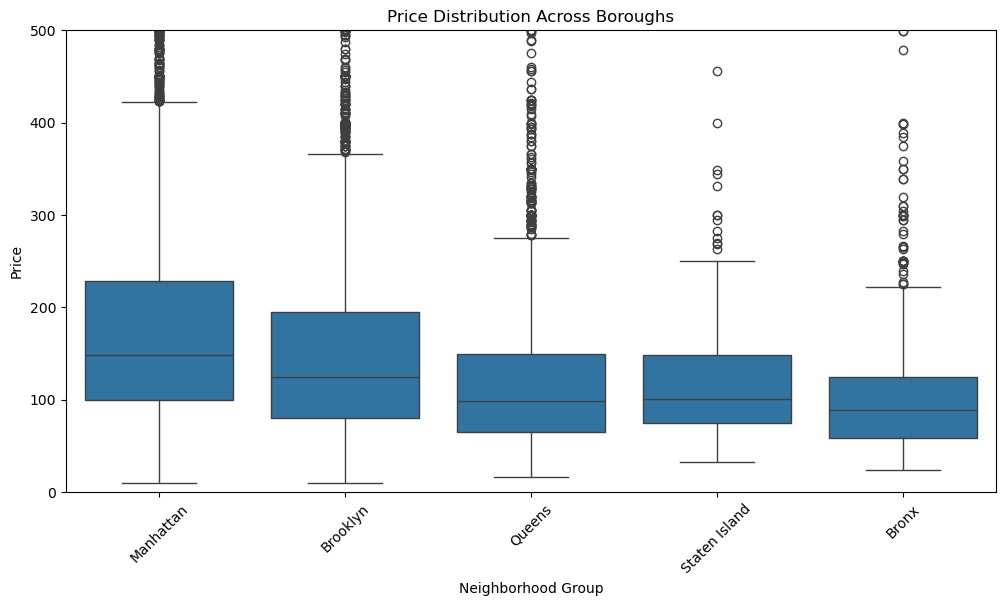

In [460]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=data)
plt.title('Price Distribution Across Boroughs')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.ylim(0, 500)
plt.show()

8) What are the busiest months for reviews?

In [462]:
data['last_review_month'].value_counts()

last_review_month
Dec    3910
Nov    2883
Sep    2421
Oct    2257
Aug    1504
Jul     713
Jun     577
May     499
Jan     365
Apr     282
Mar     188
Feb     134
Name: count, dtype: int64

*December is the busiest month for reviews, with 3,910 reviews, likely due to holiday travel and high seasonal activity.
November follows closely with 2,883 reviews, also indicating a peak before the holiday season.
September and October also show significant activity with 2,421 and 2,257 reviews, possibly linked to autumn travel trends.
Months like January (365), February (134), and March (188) see the lowest review activity, indicating a drop in bookings after the holiday season.*

9) Top 10 neighbourhood with averge rating?

In [465]:
data.groupby('neighbourhood')['rating'].mean().sort_values(ascending=False).head(10)

neighbourhood
navy yard          5.000000
neponsit           5.000000
castle hill        4.970000
randall manor      4.952500
breezy point       4.947500
arden heights      4.945000
eastchester        4.943333
grymes hill        4.936667
gerritsen beach    4.930000
eltingville        4.926667
Name: rating, dtype: float64

*Navy Yard and Neponsit stand out with perfect ratings of 5.00, followed closely by other neighborhoods such as Castle Hill and Randall Manor, all indicating consistently high guest satisfaction in these areas.*

10) What are the most profitable neighborhoods based on average price per listing?

neighbourhood
tribeca               413.391304
todt hill             345.000000
soho                  341.821053
west village          310.236111
greenwich village     298.000000
neponsit              295.000000
financial district    283.892857
vinegar hill          278.818182
dumbo                 278.750000
theater district      269.010000
Name: price, dtype: float64


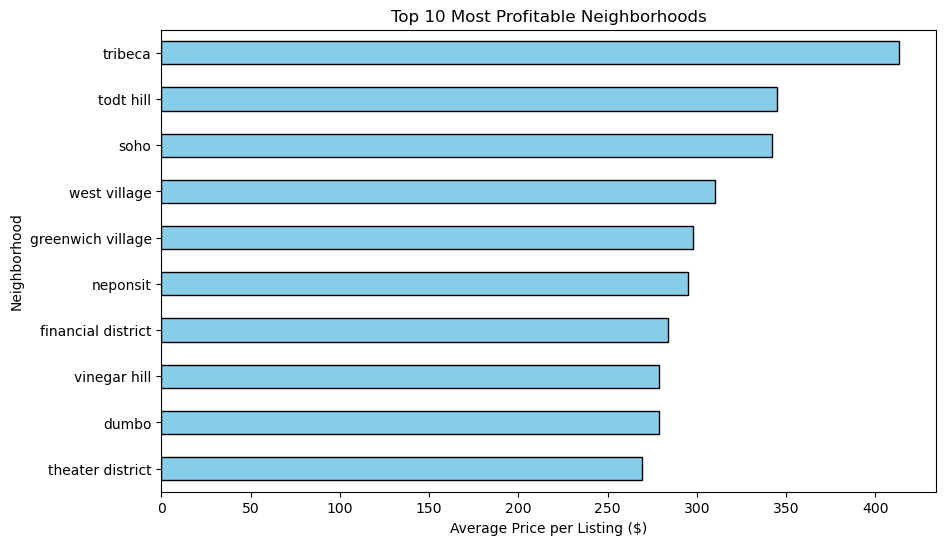

In [468]:
print(data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10))

df = pd.DataFrame(data)

top_neighbourhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_neighbourhoods.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Average Price per Listing ($)')
plt.ylabel('Neighborhood')
plt.title('Top 10 Most Profitable Neighborhoods')
plt.gca().invert_yaxis()  

plt.show()


*Tribeca is the most profitable neighborhood with an average price of $413.39 per listing, followed by high-demand areas like Todt Hill and Soho. These neighborhoods cater to a premium market, making them the most lucrative for hosts.*

 11) Neighborhoods with the highest average price per night


Top 10 Most Expensive Neighborhoods:
neighbourhood
theater district      152.562496
financial district    122.382828
midtown               120.007066
tribeca               103.495115
soho                   82.782467
murray hill            77.316838
gerritsen beach        65.044444
little neck            64.000000
downtown brooklyn      62.548246
flatiron district      61.828736
Name: price_per_day, dtype: float64


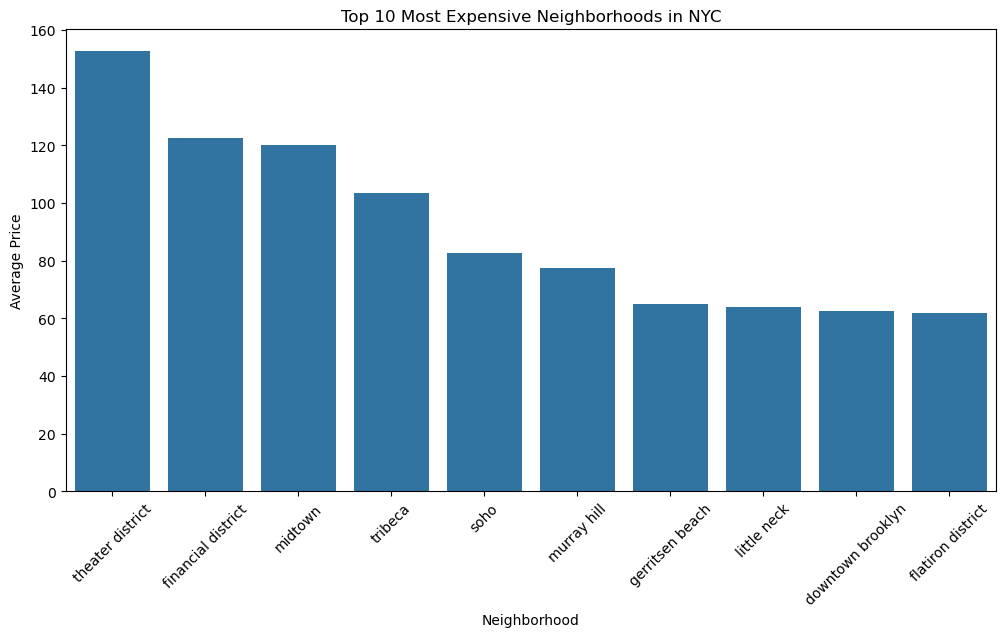

In [471]:
avg_price_neighborhood = data.groupby("neighbourhood")["price_per_day"].mean().sort_values(ascending=False)
print("Top 10 Most Expensive Neighborhoods:")
print(avg_price_neighborhood.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_neighborhood.head(10).index, y=avg_price_neighborhood.head(10).values)
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.title("Top 10 Most Expensive Neighborhoods in NYC")
plt.show()

 *The Theater District has the highest average price per night at $152.56, followed by other premium locations like Financial District and Midtown, suggesting these areas are in high demand for upscale listings.*

12) What is the correlation between price, minimum nights, number of reviews, host listings count, availability, and price per day

In [474]:
df=data[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365','price_per_day']].corr()
df

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_per_day
price,1.000000,-0.129560,-0.030385,-0.018199,0.039234,0.490352
minimum_nights,-0.129560,1.000000,-0.082588,0.018786,0.107968,-0.511885
number_of_reviews,-0.030385,-0.082588,1.000000,-0.124926,-0.090158,0.008517
calculated_host_listings_count,-0.018199,0.018786,-0.124926,1.000000,0.048257,0.011538
availability_365,0.039234,0.107968,-0.090158,0.048257,1.000000,-0.007694
price_per_day,0.490352,-0.511885,0.008517,0.011538,-0.007694,1.000000


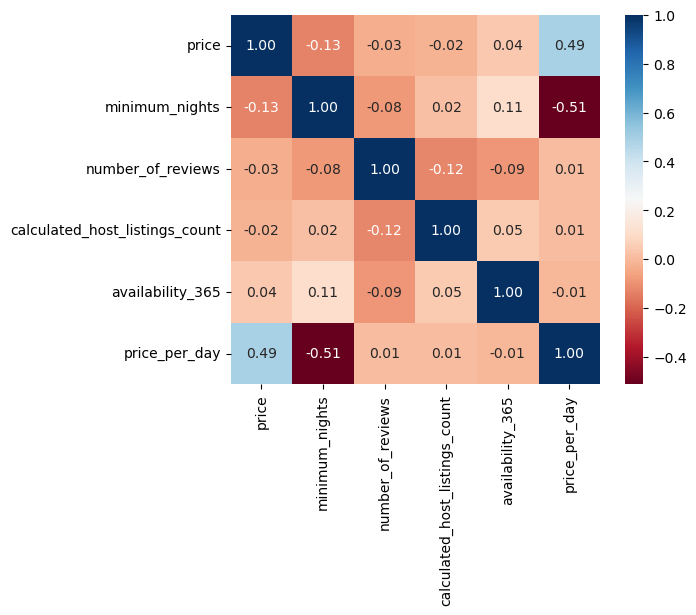

In [475]:
sns.heatmap(df, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

*There is a negative correlation of -0.51 between price_per_day and minimum_nights.*

Let's plot a scatter plot to visualize this relationship.

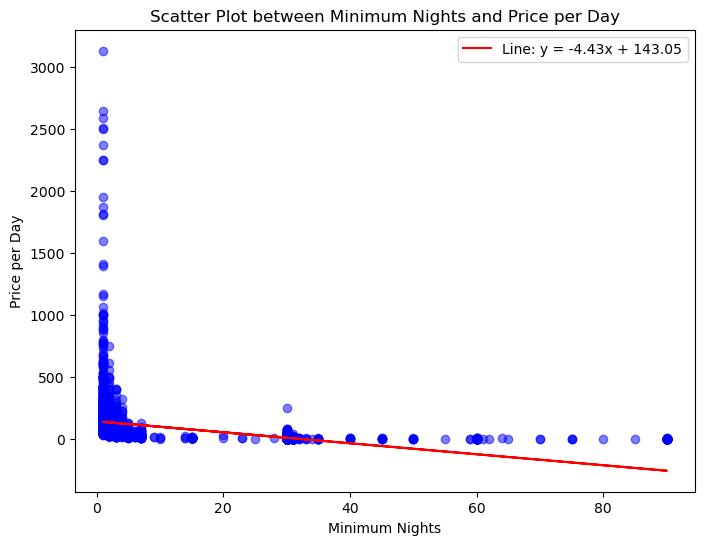

In [477]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['minimum_nights'], data['price_per_day'], alpha=0.5, color='blue')

# Fit line
slope, intercept, r_value, p_value, std_err = stats.linregress(data['minimum_nights'], data['price_per_day'])
plt.plot(data['minimum_nights'], slope * data['minimum_nights'] + intercept, color='red', label=f'Line: y = {slope:.2f}x + {intercept:.2f}')

# Title and labels
plt.title('Scatter Plot between Minimum Nights and Price per Day')
plt.xlabel('Minimum Nights')
plt.ylabel('Price per Day')

# Show legend
plt.legend()

# Show plot
plt.show()


13) How well do the selected features (rating, price, bedrooms, bathrooms, availability, and minimum nights) predict the rating, and what is the regression model's performance?

In [479]:
from sklearn.linear_model import LinearRegression

# Select relevant columns
columns = ["rating", "price", "bedrooms", "bathrooms", "availability_365", "minimum_nights"]


# Define independent and dependent variables
X = data[["price", "bedrooms", "baths", "availability_365", "minimum_nights"]]
y = data["rating"]

# Check if there are enough data points
if X.shape[0] < 10:
    print("Not enough data points for regression.")
else:
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Print coefficients
    print("Intercept:", model.intercept_)
    print("Coefficients:", dict(zip(X.columns, model.coef_)))

    # Print R² score
    print("R² Score:", model.score(X, y))


Intercept: 4.714576015085525
Coefficients: {'price': 0.00017993156265065546, 'bedrooms': -0.008003148066791511, 'baths': -0.007046810218294152, 'availability_365': -0.000154455261022581, 'minimum_nights': 0.0024292442951735277}
R² Score: 0.023897871385041514


R² Score: The model explains only about 2.39% of the variance in the rating, which is very low. This suggests that the selected features are not good predictors for the rating

14) Which neighborhoods in NYC have the highest average listing prices?

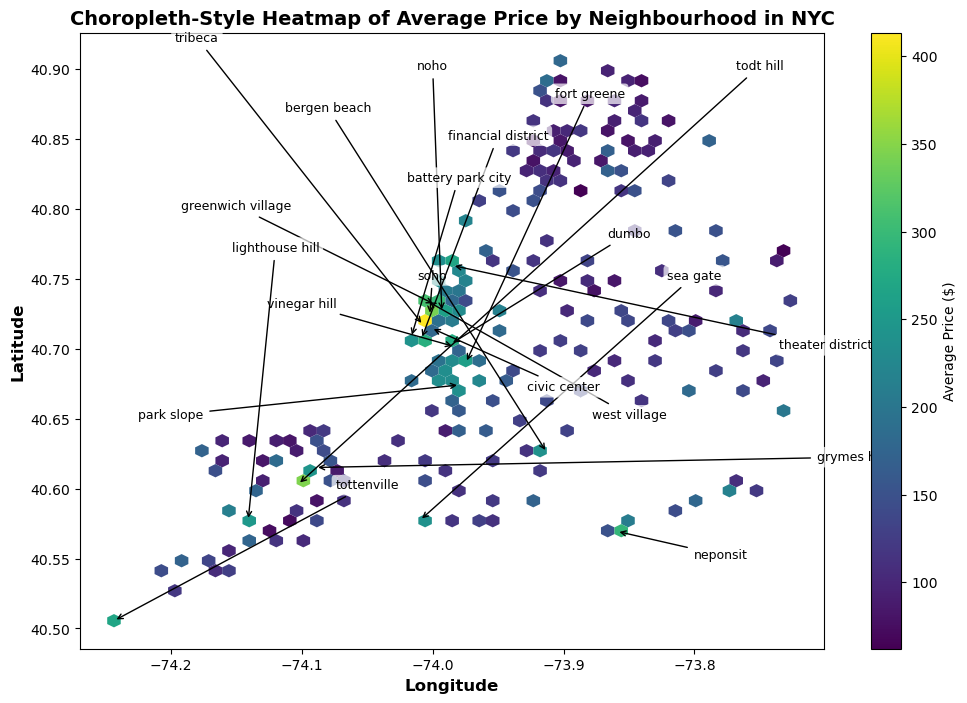

In [625]:

required_columns = ["neighbourhood", "latitude", "longitude", "price"]

data = data.dropna(subset=required_columns)

neighbourhood_avg_price = data.groupby("neighbourhood").agg({
    "latitude": "mean",
    "longitude": "mean",
    "price": "mean"
}).reset_index()

if neighbourhood_avg_price.empty:
    raise ValueError("Error: No data available after grouping. Please check column values.")

plt.figure(figsize=(12, 8))

hb = plt.hexbin(
    x=neighbourhood_avg_price["longitude"],
    y=neighbourhood_avg_price["latitude"],
    C=neighbourhood_avg_price["price"],
    gridsize=50,
    cmap="viridis", 
    reduce_C_function=np.mean,
    edgecolors="none"
)

cb = plt.colorbar(hb, label="Average Price ($)")

top_neighbourhoods = neighbourhood_avg_price.nlargest(20, "price")

label_positions = [
    (-74.18, 40.92), (-73.75, 40.90), (-74.00, 40.75), (-73.85, 40.65), (-74.15, 40.80),
    (-73.78, 40.55), (-73.95, 40.85), (-74.10, 40.73), (-73.85, 40.78), (-73.70, 40.70),
    (-74.05, 40.60), (-74.00, 40.90), (-73.88, 40.88), (-74.12, 40.77), (-73.68, 40.62),
    (-73.98, 40.82), (-74.08, 40.87), (-73.80, 40.75), (-73.90, 40.67), (-74.20, 40.65)
]

for i, (row, (lx, ly)) in enumerate(zip(top_neighbourhoods.itertuples(), label_positions)):
    plt.annotate(
        row.neighbourhood,
        xy=(row.longitude, row.latitude),
        xytext=(lx, ly),
        fontsize=9,
        ha="center",
        color="black",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round,pad=0.3"),
        arrowprops=dict(arrowstyle="->", color="black", lw=1)
    )

plt.xlabel("Longitude", fontsize=12, fontweight="bold")
plt.ylabel("Latitude", fontsize=12, fontweight="bold")
plt.title("Choropleth-Style Heatmap of Average Price by Neighbourhood in NYC", fontsize=14, fontweight="bold")

plt.show()


The heatmap suggests a geographical trend where certain areas, particularly in Manhattan, have significantly higher prices than those in outer boroughs like Staten Island or parts of Brooklyn.

### SQlAlchemy

Creating database using Sqlalchemy

In [485]:
from sqlalchemy import create_engine

DATABASE_URL = "sqlite:///mydatabase.db"  
engine = create_engine(DATABASE_URL)

data.to_sql("my_table", con=engine, if_exists="replace", index=False)

print("Data stored successfully!")

Data stored successfully!


Checking if the data is stored in the database

In [487]:
DATABASE_URL = "sqlite:///mydatabase.db"
engine = create_engine(DATABASE_URL)
df = pd.read_sql("SELECT * FROM my_table", con=engine)
print(df)


                          name    host_id           host_name  \
0      Rental unit in New York   51501835            Jeniffer   
1      Rental unit in New York  528871354              Joshua   
2      Rental unit in New York   19902271  John And Catherine   
3            Condo in New York   61391963      Stay With Vibe   
4      Rental unit in New York   51501835            Jeniffer   
...                        ...        ...                 ...   
15728  Rental unit in New York  186680487             Henry D   
15729  Rental unit in New York    3237504               Aspen   
15730  Rental unit in New York  304317395                Jeff   
15731  Rental unit in New York  163083101             Marissa   
15732    Rental unit in Queens   93827372             Glenroy   

      neighbourhood_group       neighbourhood   latitude  longitude  \
0               Manhattan      hell's kitchen  40.766610 -73.988100   
1               Manhattan             chelsea  40.750764 -73.994605   
2     

14) Who are the top 10 hosts with the most listings?

Used SQLAlchemy Core

In [489]:
from sqlalchemy import create_engine, text

DATABASE_URL = "sqlite:///mydatabase.db"  
engine = create_engine(DATABASE_URL)

query = text("""
    SELECT host_id, host_name, COUNT(*) AS count
    FROM my_table
    GROUP BY host_id, host_name
    ORDER BY count DESC
    LIMIT 10;
""")

with engine.connect() as connection:
    result = connection.execute(query)
    df = pd.DataFrame(result.fetchall(), columns=result.keys())

print(df)

     host_id        host_name  count
0  162280872  Urban Furnished    127
1   51501835         Jeniffer    104
2   61391963   Stay With Vibe     91
3  219517861     Sonder (NYC)     79
4  137358866              Kaz     77
5   51548122         Jeniffer     52
6  401202937            Eliza     52
7  200239515            Shogo     50
8   19303369           Hiroki     49
9  107434423       Blueground     45


*Urban Furnished leads with the most listings (127), followed by Jeniffer with a substantial 104 listings, showing that these hosts dominate the Airbnb platform with a significant number of properties available.*

15) Who are the top 10 hosts with the potential of highest total revenue?

Used SQLAlchemy ORM 

In [492]:
from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.orm import declarative_base, sessionmaker
import pandas as pd


engine = create_engine('sqlite:///my_database.db')

Base = declarative_base()

class MyTable(Base):
    __tablename__ = 'my_table'
    id = Column(Integer, primary_key=True, autoincrement=True)
    host_id = Column(Integer)
    host_name = Column(String)
    price = Column(Float)


Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

from sqlalchemy import func

top_hosts = (
    session.query(MyTable.host_id, MyTable.host_name, func.sum(MyTable.price).label('total_price'))
    .group_by(MyTable.host_id, MyTable.host_name)
    .order_by(func.sum(MyTable.price).desc())
    .limit(10)
    .all()
)


df_top_hosts = pd.DataFrame(top_hosts, columns=['host_id', 'host_name', 'total_price'])
print(df_top_hosts)


     host_id        host_name  total_price
0  162280872  Urban Furnished      19952.0
1  219517861     Sonder (NYC)      18732.0
2   17775359             Rove      16112.0
3  107434423       Blueground      13214.0
4   51501835         Jeniffer      12887.0
5   19408645            Shaun      12859.0
6   61391963   Stay With Vibe       9636.0
7   42619297             John       9030.0
8  448326434        Boomerang       7637.0
9  381698920           Hudson       7584.0


 *Urban Furnished leads with the highest potential revenue of $19,952, followed by Sonder (NYC) and Rove. These hosts generate substantial total revenue, indicating a strong presence in the market with high-value listings.*

## Business Insights Based on Airbnb Data

### 1. Price Categories:
- **Budget to Premium:** The majority of listings fall under **Budget** and **Economy** price categories. This suggests that a significant portion of Airbnb customers are looking for affordable accommodations. However, **Luxury** and **Premium** categories have much fewer listings, indicating less competition in the high-end market. This could be a potential opportunity for businesses to focus on high-end offerings.

### 2. Room Types:
- **Entire homes/apartments** and **private rooms** are the most common types of listings. However, **hotel rooms** have the highest average price, signaling that businesses in this category may be catering to guests willing to pay a premium for hotel-style accommodations.
- **Private and shared rooms** are more affordable, catering to budget-conscious travelers, while **entire homes** and **hotel rooms** serve a higher-paying segment of the market.

### 3. Neighborhoods with High Revenue Potential:
- Areas like **Tribeca**, **Soho**, and **Theater District** have the highest average prices per night, suggesting that businesses focusing on these high-demand, upscale neighborhoods could generate significant revenue.
- **Sonder (NYC)** and **Urban Furnished** are among the top hosts with the most listings and revenue, demonstrating that scaling operations in these profitable areas could yield substantial returns.
- **Geographical Price Trends:** The heatmap suggests a geographical trend where certain areas, particularly in **Manhattan**, have significantly higher prices than those in outer boroughs like **Staten Island** or parts of **Brooklyn**. This indicates that businesses operating in or near these high-price zones could potentially benefit from location-based pricing strategies.

### 4. Performance Metrics & Regression Analysis:
- The regression model’s **R² score of 0.02** indicates that the selected features (price, bedrooms, bathrooms, availability, and minimum nights) do not strongly predict the ratings. This suggests that businesses might want to consider other factors (such as location, host responsiveness, and property amenities) for a more accurate forecast of customer ratings.
- The **negative correlation between price per day and minimum nights** (-0.51) suggests that longer stays tend to be priced lower per night, which businesses might use to design discount strategies for long-term bookings, encouraging customers to stay for extended periods.

### 5. Reviews and Host Performance:
- Hosts like **Urban Furnished**, **Sonder (NYC)**, and **Rove** with the highest total revenues show that focusing on **host performance** and managing multiple listings can significantly boost profitability. They often have a large portfolio, which allows for economies of scale and broader market reach.
- Listings with **higher reviews** often translate into higher customer trust and pricing potential, meaning businesses should focus on maintaining high-quality customer service and guest satisfaction to improve ratings and command higher prices.

### 6. Price Dynamics and Minimum Nights:
- A **negative correlation between price per day and minimum nights** implies that longer stays may be incentivized with lower nightly rates, and businesses could leverage this to attract extended stays, particularly in budget-friendly or mid-range listings.

### **Business Implications:**
- **Opportunities in Luxury and Premium Markets:** With fewer listings in higher-end categories, businesses could invest in these segments for potentially less competition and higher profit margins.
- **Targeting Specific Neighborhoods:** High-demand, high-price neighborhoods like **Tribeca** and **Soho** could be more profitable for businesses aiming to cater to premium travelers.
- **Host Strategy:** Hosts with more listings and higher revenue potential should focus on improving customer experience and operational efficiencies to maintain or grow their market share.
- **Pricing Strategy:** Offering discounts for longer stays could be an effective strategy to attract budget-conscious travelers while maintaining a steady occupancy rate.


### Conclusion:

The insights suggest that businesses should focus on **high-demand, high-price areas** such as **Tribeca**, **Soho**, and other Manhattan neighborhoods, where the **revenue potential is strong**. The **heatmap** shows that certain areas in **Manhattan** have significantly higher prices than those in outer boroughs, indicating that businesses operating in these premium locations can leverage **location-based pricing strategies** for greater profitability.  

For **Budget** and **Economy listings**, offering **long-term stay discounts** could increase bookings, as the analysis indicates a **negative correlation between price per day and minimum nights**. Improving **guest satisfaction** and **host performance** will also help achieve better ratings, leading to the ability to **command higher prices**.

Finally, businesses operating in the **Luxury and Premium segments** may face **less competition** and find **higher profit margins** due to the limited number of listings in these categories. This presents a **promising opportunity for expansion** in high-end markets.
